In [2]:
from tensorflow.keras.datasets import cifar10, fashion_mnist
from tensorflow.keras.utils import to_categorical

In [3]:
# Load the Dataset
# The CIFAR-10 dataset is a popular benchmark dataset for image classification
# in machine learning and computer vision. It consists of 60,000 32x32 color images 
# across 10 classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck).
# The dataset is split into 50,000 training images and 10,000 test images. 
# Each class has 6,000 images, making it balanced.
# It is commonly used for training and evaluating convolutional neural networks (CNNs), 
# transfer learning, and educational purposes. Libraries like TensorFlow and PyTorch 
# provide built-in support for loading and preprocessing the dataset.


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 64s 0us/step


In [10]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [11]:
print(x_train[0][0][0])
print(y_train[0])

[59 62 63]
[6]


In [15]:
# Normalize pixel values to be between 0 and 1

x_train = x_train / 255.0
x_test = x_test / 255.0

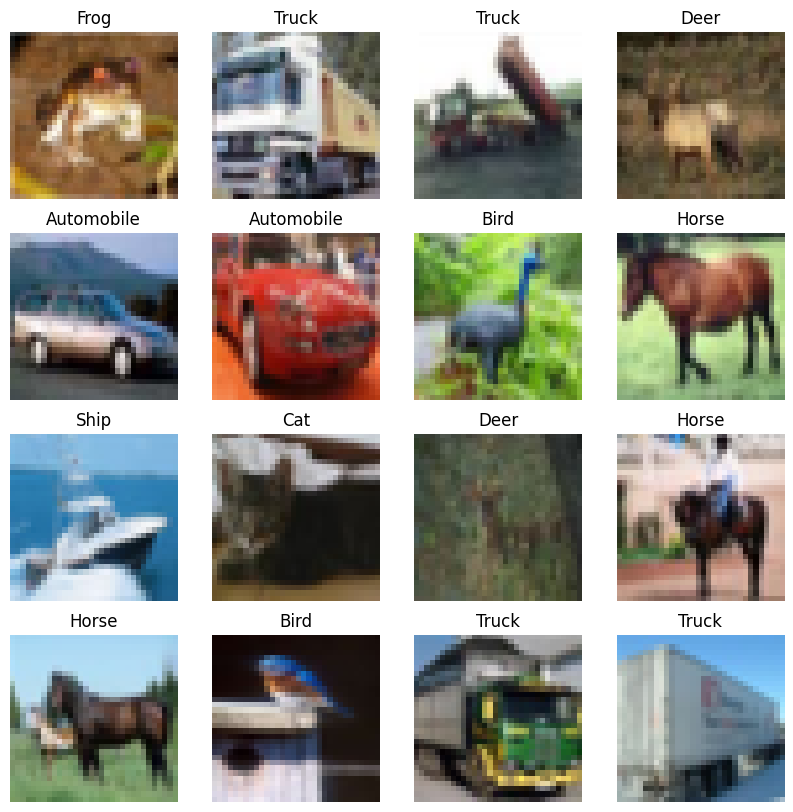

In [16]:
# Visualise The Data

import matplotlib.pyplot as plt

# Class labels
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Visualize some images
plt.figure(figsize=(10, 10))
for i in range(16):  # Display a 4x4 grid of images
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])  # Class label
    plt.axis('off') # Hide axis for cleaner image view
plt.show()

In [18]:
# Build the CNN Model

from tensorflow.keras import models, layers

model = models.Sequential([
    # First convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third convolutional layer
    layers.Conv2D(128, (3, 3), activation='relu'),

    # Flatten and add dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10)  # Output layer (10 classes)
])


d:\Projects\Learn-ML\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
import tensorflow as tf
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [20]:
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.3742 - loss: 1.6854 - val_accuracy: 0.5715 - val_loss: 1.2250
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.5972 - loss: 1.1379 - val_accuracy: 0.6291 - val_loss: 1.0588
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6688 - loss: 0.9343 - val_accuracy: 0.6805 - val_loss: 0.9159
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.7186 - loss: 0.8005 - val_accuracy: 0.6919 - val_loss: 0.8953
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.7544 - loss: 0.7036 - val_accuracy: 0.6931 - val_loss: 0.9058
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.7805 - loss: 0.6219 - val_accuracy: 0.7140 - val_loss: 0.8461
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8083 - loss: 0.5461 - val_accuracy: 0.7077 - val_loss: 0.8718
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8302 -

In [25]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.2f}")


313/313 - 1s - 4ms/step - accuracy: 0.7183 - loss: 0.9474
Test Accuracy: 0.72


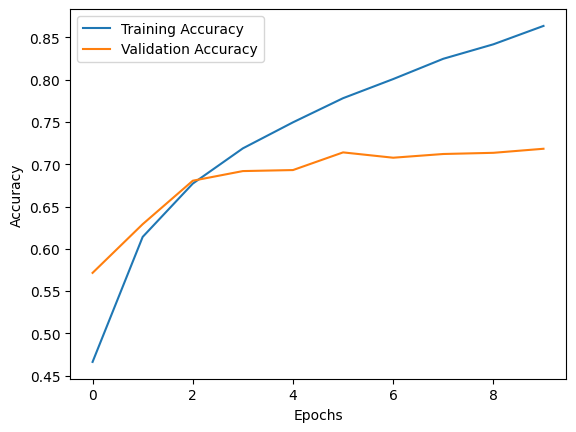

In [24]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [27]:
# Add a softmax layer for probability predictions
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predictions = probability_model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


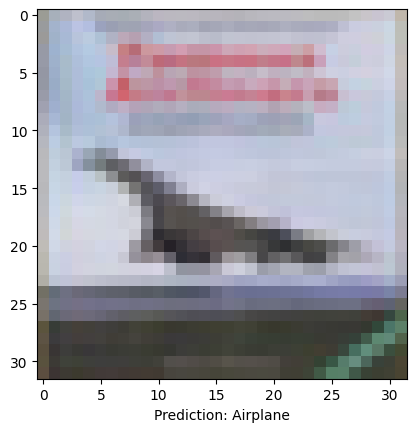

In [31]:
# Display predictions for the first test image
plt.imshow(x_test[3])
plt.xlabel(f"Prediction: {class_names[predictions[3].argmax()]}")
plt.show()


In [32]:
model.save('cifar10_cnn.keras')
